10 10


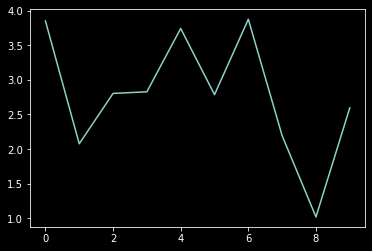

In [257]:
import random
import numpy as np
import matplotlib.pyplot as plt

def random_sine_wave(length, defect=True):
    # Generate a random amplitude
    amplitude = random.uniform(0.1, 1.0)

    # Generate a random frequency
    frequency = random.uniform(1, 20)
    frequency = np.pi * 0.5
    # Generate a random phase
    phase = random.uniform(0, np.pi * 0.1)
    # Generate the sine wave
    sine_wave = 1 * np.sin(2 * np.pi * frequency * np.arange(length) + phase) +1

    # Add noise
    if noise_level > 0:
        print(noise_level, length)
        noise = np.random.random_sample(noise_level)
        if defect:
            noise = noise + np.random.randint(0, 3, 10)
        sine_wave += noise

    return sine_wave

sine = random_sine_wave(10, defect=True)
plt.plot(sine)

In [359]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def synthetic_defects(array_size, defect_coverage=0.5, random_seed=999):
    np.random.seed(random_seed)
    def random_sine_wave(length, defect=True):
        # Generate a random amplitude
        amplitude = random.uniform(0.1, 1.0)
        # Generate a random frequency
        frequency = random.uniform(1, 20)
        frequency = np.pi * 0.5
        # Generate a random phase
        phase = random.uniform(0, np.pi * 0.1)
        # Generate the sine wave
        sine_wave = 1 * np.sin(2 * np.pi * frequency * np.arange(length) + phase) +1
        # Add noise
        noise_level = 1
        noise = np.random.random_sample(noise_level)
        if defect:
            noise = noise + np.random.randint(0, 3, 10)
        sine_wave += noise
        return sine_wave

    # Calculate the total area of the array
    data = np.zeros((array_size, array_size,10))
    mask = np.zeros((array_size, array_size))
    pixelmap = np.zeros((array_size, array_size, 2)) # 2 for x and y
    defect_area = int(array_size * defect_coverage)
    # Generate random noisy points
    for i in range(defect_area):
        num_points = defect_area
        points = []
        for j in range(num_points):
            x = random.randint(0, array_size)
            y = random.randint(0, array_size)
            points.append((x, y))
        # Connect the points in a sequence
        # all these extra loops are to make sure the points are somewhat connected
        # Definetely better ways to do this
        for j in range(num_points - 1):
            x1, y1 = points[j][1]-1, points[j][0]-1
            x2, y2 = points[j + 1][1]-1, points[j + 1][0]-1
            x1=0 if x1<0 else x1
            y1=0 if y1<0 else y1
            x2=0 if x2<0 else x2
            y2=0 if y2<0 else y2
            mask[x1][y1] = 1
            mask[x2][y2] = 1
    
    for i in range(array_size):
        for j in range(array_size):
            pixelmap[i][j] = 
            if np.sum(data[i][j]) > 0:
                continue
            else:
                if mask[i][j] == 1:
                    data[i][j] = random_sine_wave(10, defect=True)
                else:
                    data[i][j] = random_sine_wave(10, defect=False)

    sine = random_sine_wave(10, defect=True)
    plt.plot(sine)
    # Plot the array
    #print(np.min(data), np.max(data))
    scale = MinMaxScaler()
    data = np.round(scale.fit_transform(arr.reshape(-1, 10)).reshape(64, 64, 10), 3)
    #data = data.astype(np.float16) - 4 times lighter than float64 but going with float32 for now
    print(np.min(data), np.max(data), np.median(data))
    plt.imshow(np.sum(data, axis=2))
    plt.imshow(mask)
    plt.colorbar()
    plt.show()
    return data

0.0 1.0 0.217


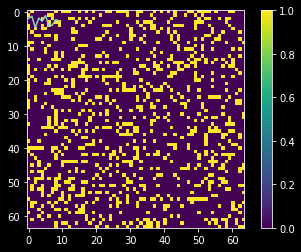

In [360]:
arr = synthetic_defects(64, 0.5, random_seed=2)

In [22]:
import logging
logger = logging.getLogger(__name__)
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import logging
logger = logging.getLogger(__name__)
SCAN_DICT = {"low_defect_scan": {"defect_coverage": 0.15, "random_seed": 9}, 
             "medium_defect_scan": {"defect_coverage": 0.5, "random_seed": 9}, 
             "high_defect_scan": {"defect_coverage": 0.8, "random_seed": 9},
             "random": {"defect_coverage": np.random.randn(), "random_seed": int(np.random.uniform(1,1000))}}

def synthetic_defects(img_dim, n_channels, scan_type):
    defect_coverage = SCAN_DICT[scan_type]["defect_coverage"]
    random_seed = SCAN_DICT[scan_type]["random_seed"]
    np.random.seed(random_seed)
    def random_sine_wave(length, defect=True):
        # Generate a random amplitude
        amplitude = random.uniform(0.1, 1.0)
        # Generate a random frequency
        frequency = np.pi * 0.5
        # Generate a random phase
        phase = random.uniform(0, np.pi * 0.1)
        # Generate the sine wave
        sine_wave = 1 * np.sin(2 * np.pi * frequency * np.arange(length) + phase) +1
        # Add noise
        noise_level = 1
        noise = np.random.random_sample(noise_level)
        if defect:
            noise = noise + np.random.randint(0, 3, 10)
        sine_wave += noise
        return sine_wave
    
    def feature_builder(datapoint):
        min_val = np.min(datapoint, axis=1)
        max_val = np.max(datapoint, axis=1)
        mean_val = np.mean(datapoint, axis=1)
        std_val = np.std(datapoint, axis=1)
        snr_val = mean_val / (std_val+1)
        num_peaks = np.sum(datapoint > 0.8, axis=1)
        # Stack the calculated features horizontally to get a (6000, 6) array
        features = np.column_stack((min_val, max_val, mean_val, std_val, snr_val, num_peaks))
        return features
    
    # Calculate the total area of the array
    data = np.zeros((img_dim, img_dim,10))
    mask = np.zeros((img_dim, img_dim))
    pixelmap = np.zeros((img_dim, img_dim, 2)) # 2 for x and y
    defect_area = int(img_dim * defect_coverage)
    # Generate random noisy points
    for i in range(defect_area):
        num_points = defect_area
        points = []
        for j in range(num_points):
            x = random.randint(0, img_dim)
            y = random.randint(0, img_dim)
            points.append((x, y))
        # Connect the points in a sequence
        # all these extra loops are to make sure the points are somewhat connected
        # Definetely better ways to do this
        for j in range(num_points - 1):
            x1, y1 = points[j][1]-1, points[j][0]-1
            x2, y2 = points[j + 1][1]-1, points[j + 1][0]-1
            x1=0 if x1<0 else x1
            y1=0 if y1<0 else y1
            x2=0 if x2<0 else x2
            y2=0 if y2<0 else y2
            mask[x1][y1] = 1
            mask[x2][y2] = 1
    
    for i in range(img_dim):
        for j in range(img_dim):
            pixelmap[i][j] = [i, j]
            if np.sum(data[i][j]) > 0:
                continue
            else:
                if mask[i][j] == 1:
                    data[i][j] = random_sine_wave(n_channels, defect=True)
                else:
                    data[i][j] = random_sine_wave(n_channels, defect=False)

    sine = random_sine_wave(10, defect=True)
    #plt.plot(sine)
    # Plot the array
    #print(np.min(data), np.max(data))
    scale = MinMaxScaler()
    data = np.round(scale.fit_transform(data.reshape(-1, 10)))#.reshape(64, 64, 10), 3)
    data = feature_builder(data)
    mask = mask.reshape(-1,).reshape(-1,1)
    pixelmap = pixelmap.reshape(img_dim, img_dim, 2).reshape(-1, 2)
    #data = data.astype(np.float16) - 4 times lighter than float64 but going with float32 for now
    print(np.min(data), np.max(data), np.median(data))

    # last column is defect
    columns = ['min', 'max', 'mean', 'std', 'snr', 'num_peaks', "backwall", "frontwall", "ramp",  "geometry", "defect"]
    # add zeros where the new artificial features will be
    data = np.column_stack((data, np.zeros((data.shape[0], 4))))
    data = np.column_stack((data, mask))
    df = pd.DataFrame(data, columns=columns)
    logger.info("mask shape is %s", mask.shape)
    logger.info("data shape is %s", data.shape)
    logger.info("mask sum is %s", np.sum(mask))
    print(len(mask))
    # distribute defect classes
    
    df.loc[df['defect'] == 1, "defect"] = np.random.choice([1, 2], size=(df['defect'] == 1).sum(), p=[0.5, 0.5])
    print(df.shape)
    print(df[df['defect'] == 0].shape)
    print(df[df['defect'] == 1].shape)
    print(df[df['defect'] == 2].shape)
    #print(np.random.choice([1, 2], size=(df['defect'] == 1).sum(), p=[0.5, 0.5]))

    
    # backwall
    df.loc[df['defect'] == 1, 'backwall'] = np.random.choice([0, 1], size=(df['defect'] == 1).sum(), p=[0.2, 0.8])
    df.loc[df['defect'] == 2, 'backwall'] = np.random.choice([0, 1], size=(df['defect'] == 2).sum(), p=[0.8, 0.2])
    # frontwall
    df.loc[df['defect'] == 1, 'frontwall'] = np.random.choice([0, 1], size=(df['defect'] == 1).sum(), p=[0.8, 0.2])
    df.loc[df['defect'] == 2, 'frontwall'] = np.random.choice([0, 1], size=(df['defect'] == 2).sum(), p=[0.2, 0.8])
    # ramp
    df.loc[df['defect'] == 1, 'ramp'] = np.random.choice([0, 1], size=(df['defect'] == 1).sum(), p=[0.6, 0.4])
    df.loc[df['defect'] == 2, 'ramp'] = np.random.choice([0, 1], size=(df['defect'] == 2).sum(), p=[0.4, 0.6])
    # geometry
    df.loc[df['defect'] == 1, 'geometry'] = np.random.choice([0, 1], size=(df['defect'] == 1).sum(), p=[0.4, 0.6])
    df.loc[df['defect'] == 2, 'geometry'] = np.random.choice([0, 1], size=(df['defect'] == 2).sum(), p=[0.6, 0.4])
    
    return df.drop(columns = ["defect"]), df["defect"], pixelmap, columns 

In [25]:
a, b, c, d = synthetic_defects(64, 10, "high_defect_scan")

0.0 10.0 0.0
4096
(4096, 11)
(2336, 11)
(855, 11)
(905, 11)


In [26]:
b

0       2.0
1       2.0
2       0.0
3       2.0
4       2.0
       ... 
4091    1.0
4092    1.0
4093    0.0
4094    1.0
4095    2.0
Name: defect, Length: 4096, dtype: float64